<a href="https://colab.research.google.com/github/Adidzaky/UAS_ANALITIKA_DATA/blob/master/Adi_Dzaky_Hamdani_UAS_Analitika_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FORECASTING**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/maharshipandya/twitter-stocks-dataset

In [17]:
#https://drive.google.com/drive/folders/1tbbaLSd17qeiQ8ZFF2224hHI5DL_tzcf?usp=sharing

!gdown 1tbbaLSd17qeiQ8ZFF2224hHI5DL

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1tbbaLSd17qeiQ8ZFF2224hHI5DL 



In [18]:
train_data = pd.read_csv('twitter-stocks.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


Check missing values : Dalam dataset yang diberikan, kita perlu memeriksa apakah terdapat nilai yang hilang atau tidak lengkap. Nilai yang hilang dapat mempengaruhi analisis dan model yang kita buat.

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.7+ KB


Check statistic values for every features: Untuk melihat statistik nilai untuk setiap fitur pada dataset. memberikan ringkasan statistik seperti count (jumlah entri), mean (rata-rata), std (standar deviasi), min (nilai minimum), quartiles (kuartil 25%, 50%, 75%), dan max (nilai maksimum) untuk setiap kolom numerik dalam dataset.

In [20]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
std,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07
min,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08


Handle datetime data for time series: mengubah kolom 'Date' menjadi tipe data datetime menggunakan pd.

Selanjutnya, mencetak lima baris pertama dari data dengan train_data.head() untuk memastikan perubahan tersebut.

In [21]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

langkah untuk menggambarkan perubahan harga penutupan saham dari waktu ke waktu. Grafik ini memberikan gambaran visual tentang bagaimana harga penutupan saham berfluktuasi selama periode tertentu.

*   Pada sumbu x, kita memiliki skala waktu yang mewakili tanggal dari data yang digunakan. Sedangkan pada sumbu y, kita memiliki skala harga yang mewakili harga penutupan saham yang telah disesuaikan.


*   Dalam kode yang diberikan, kita menggunakan matplotlib untuk membuat plot. Fungsi plt.figure(figsize=(11, 6)) mengatur ukuran plot menjadi 11 inci lebar dan 6 inci tinggi.

*   Kemudian, kita menggunakan train_data['Adj Close'].plot() untuk membuat plot dari kolom 'Adj Close' dalam dataframe 'train_data'. Ini akan menggambar garis yang menghubungkan titik-titik harga penutupan saham yang telah disesuaikan.

*   untuk memberikan judul pada plot dengan menggunakan plt.title('Closing Price History'). Judul ini menjelaskan konten dari grafik.
*   plt.xlabel('Date') memberikan label pada sumbu x dengan teks 'Date', yang menunjukkan bahwa sumbu tersebut mewakili tanggal.

*   plt.ylabel('Closing Price') memberikan label pada sumbu y dengan teks 'Closing Price', yang menunjukkan bahwa sumbu tersebut mewakili harga penutupan saham.

*   menggunakan plt.show() untuk menampilkan plot kepada pengguna.

Dengan visualisasi ini, dapat di lihat pola dan tren harga penutupan saham dari waktu ke waktu. Ini dapat membantu dalam analisis dan pengambilan keputusan investasi.

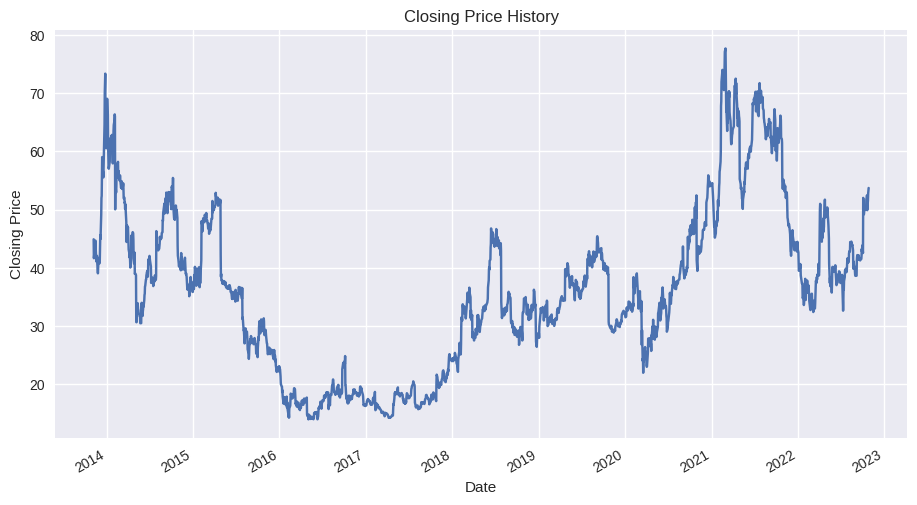

In [22]:
plt.figure(figsize=(11, 6)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

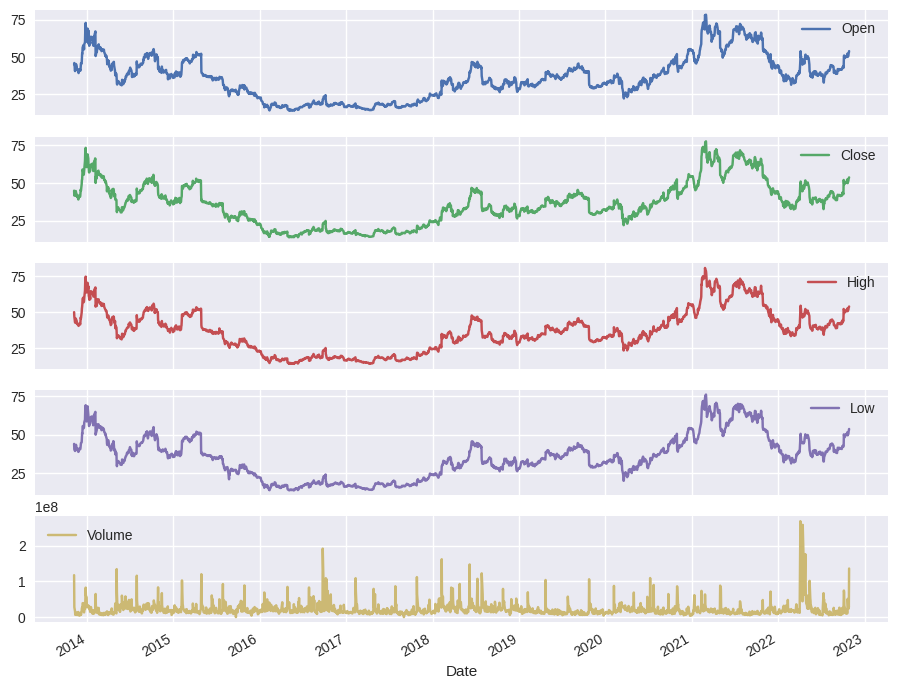

In [23]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close','High' ,'Low' , 'Volume']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

membuat daftar cols yang berisi nama-nama kolom yang ingin divisualisasikan, yaitu 'Open', 'Close', 'High', 'Low', dan 'Volume'.

Parameter subplots=True memungkinkan untuk membagi plot menjadi beberapa subplot terpisah.

pada tahun 2014 menempati persentil 75 dan sempat menurun di akhir tahun, harga saham jatuh pada saat tahun 2016, 2017, 2018 hingga ke bawah 25 persen.

sedangkan harga tertinggi pada saat di tahun 2021 dengan menyentuh persentil 75.

***PERCENTAGE***

In [24]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

 menghitung persentase perubahan antara harga tertinggi (High) dan harga terendah (Low) dalam satu hari perdagangan.

menghitung selisih antara harga penutupan dan harga pembukaan, kemudian membaginya dengan harga pembukaan, dan mengalikan dengan 100 untuk mendapatkan persentase perubahan.

In [25]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Membuat DataFrame baru yang hanya berisi kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' dari DataFrame train_data. DataFrame baru ini disimpan dalam variabel df dan akan berisi data dari kolom-kolom tersebut.

In [26]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

113


<ipython-input-26-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Dalam hal ini, menggunakan nilai negatif -forecast_out, yang berarti nilai-nilai dalam kolom 'Adj Close' akan dipindahkan ke atas sebanyak forecast_out langkah.

Dengan demikian, kolom 'label' akan berisi nilai 'Adj Close' yang dipindahkan ke atas sebanyak forecast_out langkah, yang akan digunakan sebagai target atau label dalam proses prediksi.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

terlihat jelas bahwa terdapat tren peningkatan secara keseluruhan dalam harga saham dari waktu ke waktu. Namun, juga terlihat adanya pola musiman atau fluktuasi periodik dalam harga, di mana harga saham mengalami periode naik dan turun. Pola musiman ini bisa disebabkan oleh berbagai faktor seperti kondisi pasar, peristiwa ekonomi, atau faktor-faktor khusus industri yang memengaruhi harga saham. Dengan mengidentifikasi pola dan tren ini, hal tersebut dapat membantu dalam membuat prediksi dan memahami perilaku harga saham di masa depan.

In [28]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-28-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


X_Predictions : adalah data yang akan di prediksi
X             : adalah data yang akan di uji

In [29]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [30]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-30-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


df.dropna : digunakan untuk menghapus baris yang mengandung nilai yang hilang (NaN) dari dataframe df. Operasi ini dilakukan secara in-place, yang berarti dataframe df akan diubah langsung.

 y akan diinisialisasi sebagai array numpy yang berisi kolom 'label' dari dataframe df. Kolom 'label' ini akan digunakan sebagai target variabel yang ingin diprediksi oleh model.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X adalah matriks fitur yang akan digunakan untuk pelatihan dan pengujian.

y adalah larik target yang akan digunakan untuk pelatihan dan pengujian.

test_size=0.2 menentukan proporsi data yang akan dialokasikan untuk pengujian, dalam hal ini 20% dari data akan digunakan untuk pengujian.

random_state=42 digunakan untuk pembagian data menjadi subset pelatihan dan pengujian akan konsisten setiap kali kode dijalankan.

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

X_train (subset pelatihan fitur) dan y_train (subset pelatihan target).

Skor yang dihasilkan mencerminkan sejauh mana model mampu menjelaskan variasi dalam data pengujian. Skor ini disimpan dalam variabel lr_confidence

In [33]:
lr_confidence

0.4347915038919189

nilai skor atau kepercayaan model Linear Regression terhadap data pengujian (X_test dan y_test).

Skor tersebut mengindikasikan sejauh mana model dapat menjelaskan variasi dalam data pengujian.

Nilai skor dapat berada dalam rentang 0 hingga 1, di mana semakin dekat dengan 1, semakin baik kinerja model.

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [35]:
rf_confidence

0.5142795172162722

Nilai skor ini juga mengindikasikan sejauh mana model **rf_confidence** dapat menjelaskan variasi dalam data pengujian.


---





---

melakukan prediksi menggunakan model Random Forest Regression (RF) dan mengisi kolom 'Forecast' dalam DataFrame df dengan nilai-nilai prediksi.

In [36]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-36-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-36-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-36-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

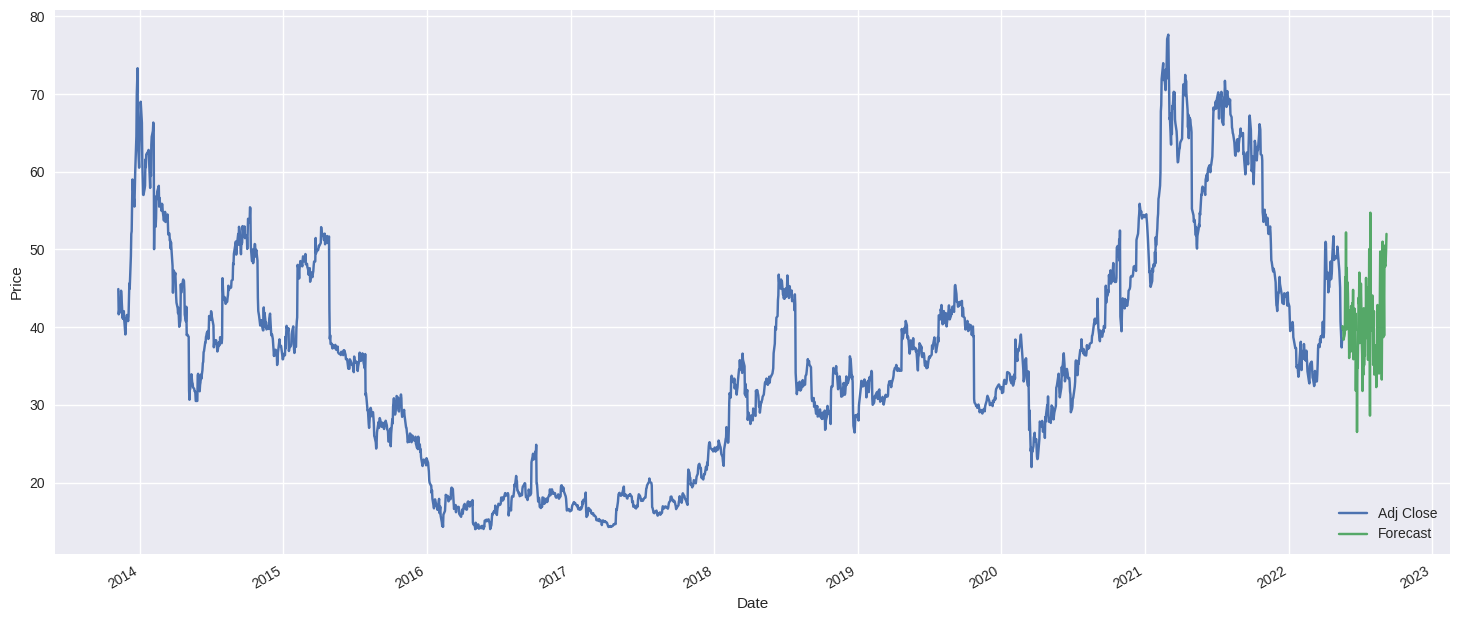

In [37]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Berdasarkan plot yang ditampilkan, terlihat adanya tren naik dan turun pada harga penutupan yang disesuaikan Adj Close dan Forecast. Terdapat periode di mana harga penutupan aktual dan prediksi menunjukkan tren kenaikan yang stabil, menunjukkan potensi keuntungan bagi investor. Perbedaan antara tren aktual dan prediksi dapat memberikan petunjuk penting tentang volatilitas pasar dan kompleksitas dalam memprediksi pergerakan harga saham.

## Clustering

<ipython-input-38-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


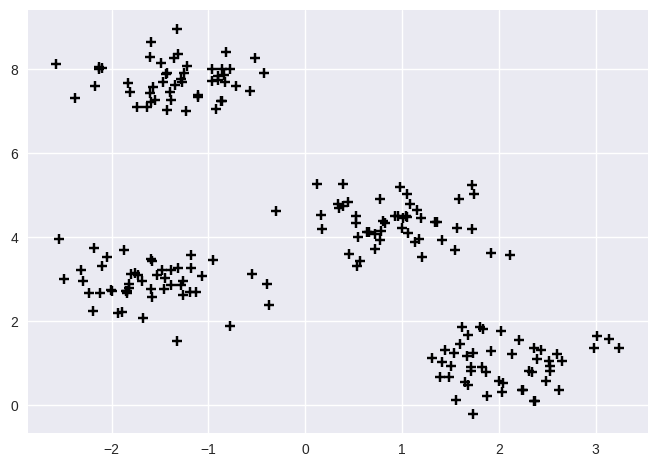

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


In [39]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

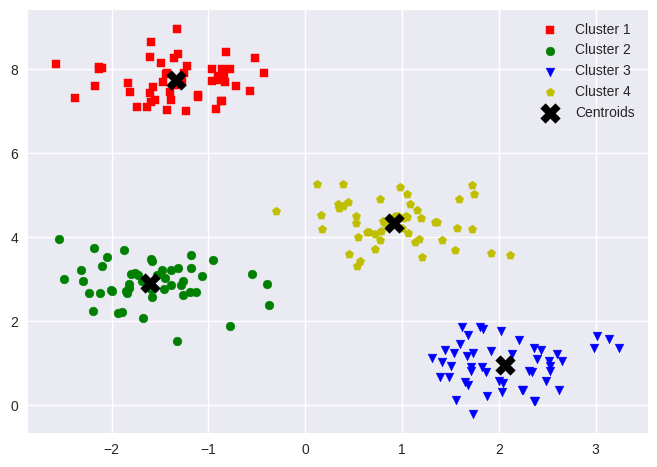

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

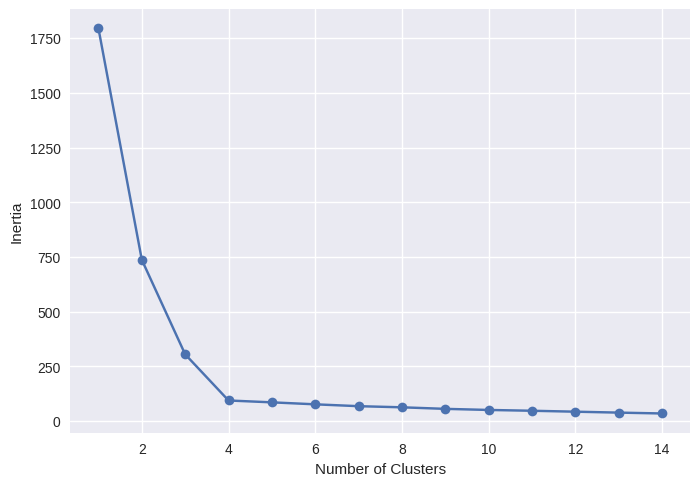

In [41]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Another example for KMeans

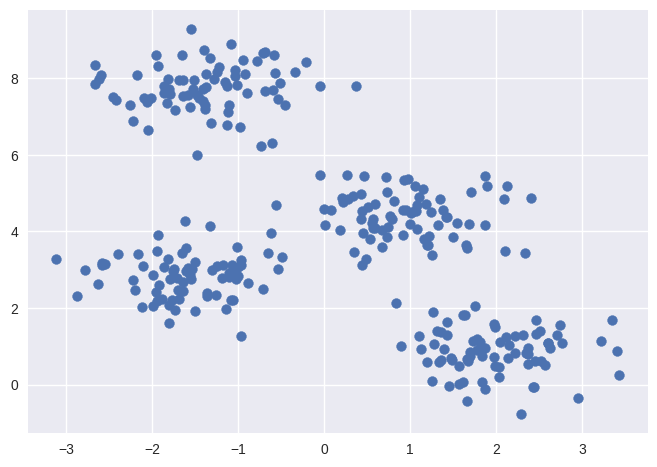

In [42]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

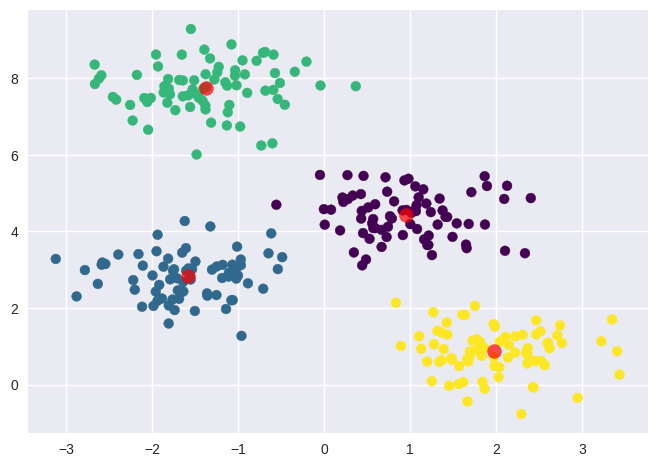

In [44]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [46]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

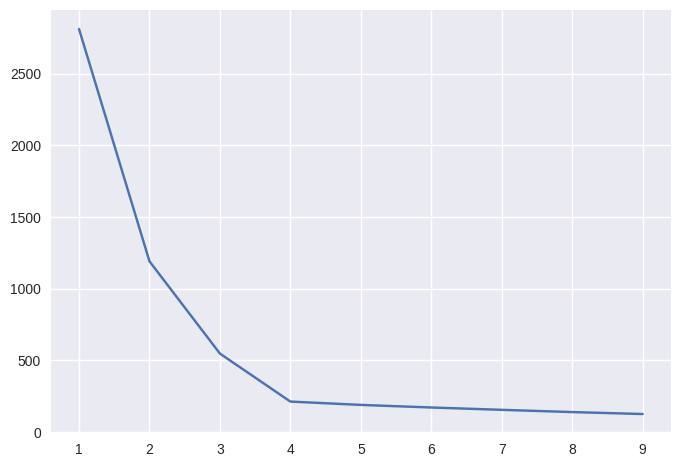

In [47]:
plt.plot(range(1,10),inersia)
plt.show()

KMean6 with 6 cluster

In [48]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


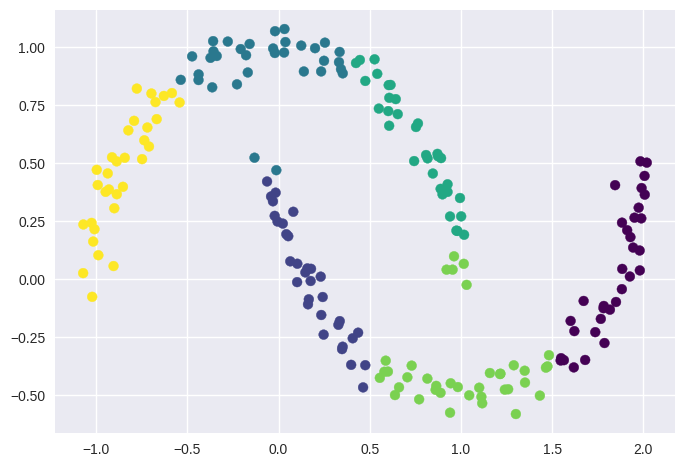

In [49]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


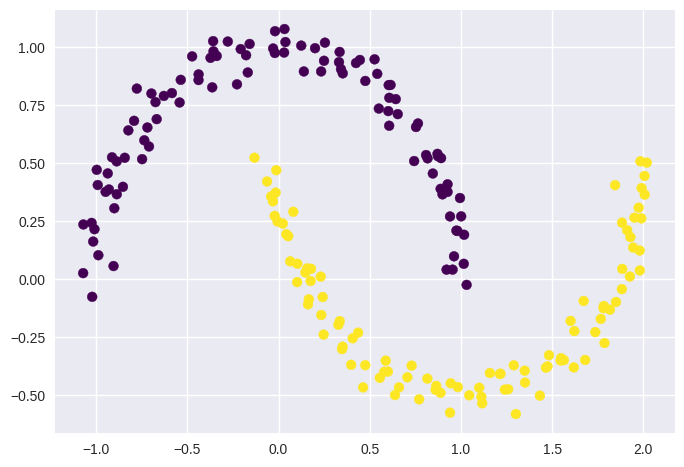

In [50]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**DBScan**

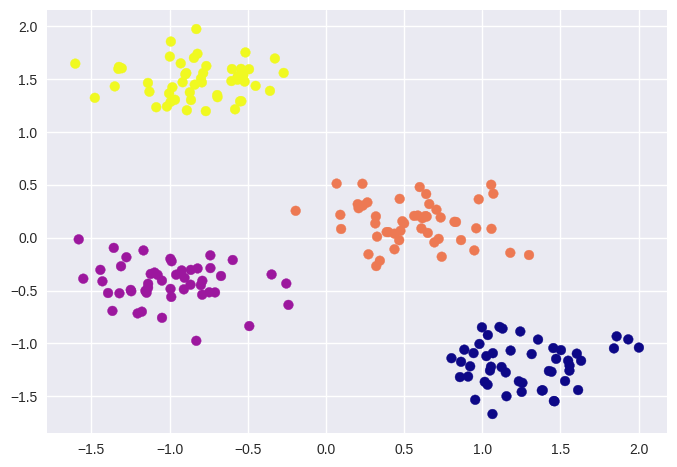

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


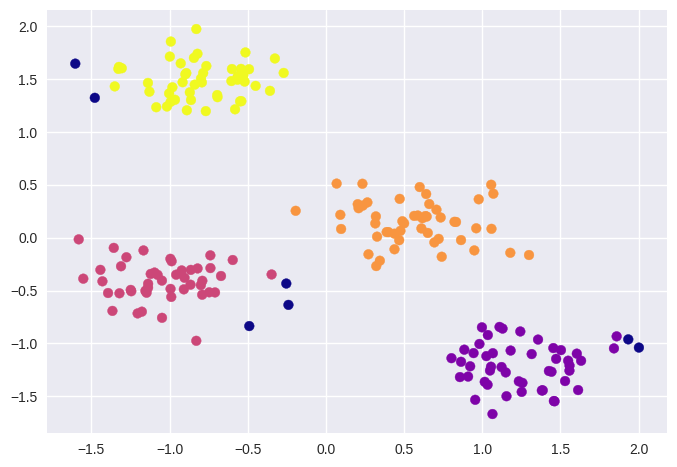

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()
